In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as sci

pd.set_option('float_format', '{:6.3f}'.format)
sns.set(style='ticks')

import warnings
warnings.filterwarnings("ignore")

In [2]:
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = 20,4

In [3]:
#Q5
df=pd.read_csv('CAT.csv')

In [4]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1962-12-01,1.505,1.583,1.474,1.557,0.137,3909600
1,1963-01-01,1.557,1.620,1.542,1.604,0.141,3465600
2,1963-02-01,1.604,1.609,1.458,1.458,0.129,3072000
3,1963-03-01,1.458,1.536,1.443,1.521,0.134,3237600
4,1963-04-01,1.521,1.594,1.521,1.552,0.137,4440000


In [5]:
df['adj_close_ln'] = df['Adj Close'].map(lambda x: np.log(x))
df['net_return'] = df['Adj Close'].diff(1)/df['Adj Close'].shift(1)*100
df['return_ln'] = df['adj_close_ln'].diff(1)*100

In [6]:
df['net_return'].dropna().std()

8.443139861283912

In [7]:
df['net_return'].dropna().mean()

1.3592549501946947

In [8]:
sci.gmean(np.array(df['net_return'].dropna()))

nan

In [9]:
df['return_ln'].dropna().std()

8.440598591230625

In [10]:
df['return_ln'].dropna().mean()

0.9984865912836414

In [13]:
df['return_ln'].dropna()

1       2.965
2      -8.875
3       4.197
4       2.033
5      18.309
6      -2.857
7       0.578
8       4.069
9      -3.689
10      7.246
11      2.021
12      1.840
13      8.723
14      4.097
15     12.544
16     -2.469
17      3.728
18      5.884
19      5.015
20     -1.612
21      5.055
22      6.145
23     11.209
24     -1.802
25     -1.527
26      9.170
27     -8.240
28     11.574
29     -2.711
30     -2.865
        ...  
657     5.964
658     8.519
659     4.459
660    11.011
661     3.247
662    -4.673
663    -4.802
664    -2.070
665     5.600
666   -11.306
667     5.820
668    -2.892
669     9.370
670   -22.867
671    11.815
672    -6.549
673     4.681
674     3.732
675    -1.356
676     2.859
677   -14.554
678    12.888
679    -3.449
680    -9.351
681     5.962
682     8.706
683     5.690
684     2.018
685   -11.718
686    -1.106
Name: return_ln, Length: 686, dtype: float64

In [16]:
sci.gmean([1,2,-3,5])

nan

The volatility for the returns of this stock is not so high about 4%, therefore it is not so risky

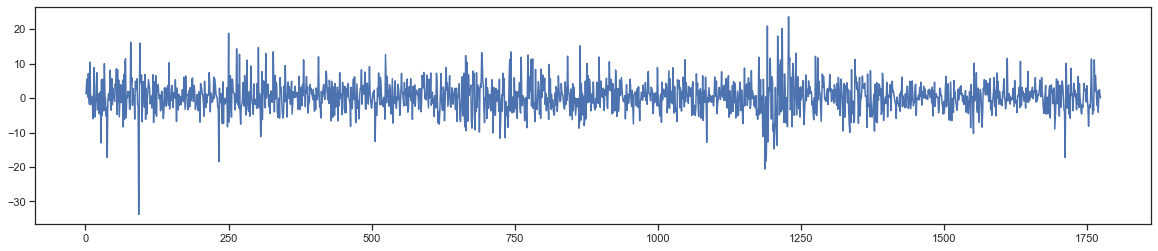

In [291]:
plt.plot(df['net_return'].dropna())
plt.show()

looking at the plot we see that volatility differs over time, so it means that the distribution of the returns alters but not a lot.

In [292]:
#2
from scipy import stats
stats.jarque_bera(df['net_return'].dropna())

(1034.7064045789189, 0.0)

In [293]:
stats.jarque_bera(df['return_ln'].dropna())

(2533.170666969156, 0.0)

the hypothesis h0 is rejected, p-value is quite low, therefore according to the test the distributions for both returns are not normal.

In [294]:
#3
t_bill = pd.read_csv('TB3MS.csv',index_col = 0)/12
stock = pd.read_csv('CAT-2.csv',index_col = 0)

In [295]:
stock['net_return'] = stock['Adj Close'].diff(1)/stock['Adj Close'].shift(1)*100

In [296]:
stock.head()

,Open,High,Low,Close,Adj Close,Volume,net_return
Date,,,,,,,
1986-01-01,5.250,5.875,4.906,5.719,0.687,54699200,nan
1986-02-01,5.719,6.391,5.609,6.344,0.781,71880000,13.707
1986-03-01,6.344,6.703,6.250,6.578,0.810,62248000,3.695
1986-04-01,6.578,6.922,5.938,6.625,0.815,62166400,0.713
1986-05-01,6.625,6.891,6.203,6.781,0.852,53789600,4.474


In [297]:
x = 0
for i in range(1,408):
    if stock['net_return'].iloc[i] > float(t_bill.iloc[i]):
        x += 1
x

237

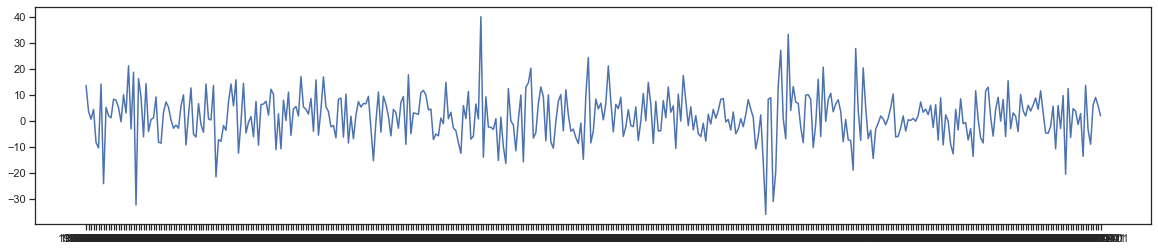

In [298]:
plt.plot(stock['net_return'].dropna())
plt.show()

In [299]:
x = 0
for i in range(1,408):
    if stock['net_return'].iloc[i] >= 0:
        x += 1
x

241

In [300]:
print(t_bill.mean(),'\n',t_bill.median(),'\n', t_bill.std())

TB3MS    0.264
dtype: float64 
 TB3MS    0.255
dtype: float64 
 TB3MS    0.205
dtype: float64


In [301]:
stock['net_return'].mean()

1.741239939880668

In [302]:
stock['net_return'].median()

1.9396364268939636

In [303]:
stock['net_return'].std()

9.078382743354947

In [304]:
print(float(t_bill.mean()/t_bill.std()),'\n',stock['net_return'].mean()/stock['net_return'].std())

1.284299546616966 
 0.19180067519792482


This stock was better compared to T-bill in 237 events out of 407 more than 50%. Sometimes there were huge differences in the returns, nevertheless t-bill is more stable and has about 8 times lower mean and median. I would say this stock is not a bad investment. It depends on an attitude to the risk.

In [305]:
#4
sci.ttest_1samp(stock['net_return'].dropna(),popmean = 10)

Ttest_1sampResult(statistic=-18.352852103653344, pvalue=3.2243366082785254e-55)

I conducted T test. the null hypothesis is the expected return is equal to 10, the alternative hypothesis is the expected return is not equal to 10. under 5% level of significance the null hypothesis is rejected, p-value is quite low. It means that according to the distribution of the returns the expected return of 10 is too far away from the sample mean. In other words, the expected return is not equal to 10.

In [306]:
#Q6
#1
t_bill_w = pd.read_csv('WTB3MS.csv')
dji = pd.read_csv('^DJI.csv')

In [307]:
dji['net_return'] = dji['Adj Close'].diff(1)/dji['Adj Close'].shift(1)*100

In [312]:
dji['excess_return'] = dji['net_return'] - t_bill_w['WTB3MS']/52
df['excess_return'] = df['net_return'] - t_bill_w['WTB3MS']/52

In [318]:
from statsmodels.regression.linear_model import OLS
model = OLS(df['excess_return'].dropna(), sm.add_constant(dji['excess_return'].dropna()))
results = model.fit(cov_type='HC0') 
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          excess_return   R-squared:                       0.443
Model:                            OLS   Adj. R-squared:                  0.443
Method:                 Least Squares   F-statistic:                     1065.
Date:                Sun, 02 Feb 2020   Prob (F-statistic):          2.40e-183
Time:                        17:45:15   Log-Likelihood:                -4662.7
No. Observations:                1773   AIC:                             9329.
Df Residuals:                    1771   BIC:                             9340.
Df Model:                           1                                         
Covariance Type:                  HC0                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1770      0.079      2.231

Beta is a little bit higher than market beta, but not so much. This stock is not too risky according to the market risk

#2
alpha is equal to 0.17,statistically significant and positive, meaning it looks attractive.

In [326]:
#3
np.square(1.3336)*dji['net_return'].var()

8.977052281230119

systematic

In [327]:
results.resid.var()

11.272316620704599

idiosyncratic 

In [328]:
np.sqrt(df['net_return'].var() - np.square(1.3336)*dji['net_return'].var())

3.356719313059282

idiosyncratic volatility

In [330]:
np.sqrt(df['net_return'].var() - results.resid.var())

2.995379810172776

systematic volatility

In [334]:
print(dji.net_return.mean(),dji.net_return.std())

0.1894684664833277 2.246680368280755


In [333]:
print(df.net_return.mean(),df.net_return.std())

0.40936330375979807 4.499401830009774


Idiosyncratic volatility is a little bit larger than systematic one. We see that the mean return of our stock is two times larger. Our model shows the estimated beta it is equal to 1.3 . In reality, our stock return has to be lower if there wasn't idiosyncratic risk. This company depends on some firm specific features, this is reflected in the price. R-square is 0.44 meaning 44% explained by the market risk.

In [340]:
#4
#80th
model = OLS(df['excess_return'][:209].dropna(), sm.add_constant(dji['excess_return'][:209].dropna()))
results = model.fit(cov_type='HC0') 
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          excess_return   R-squared:                       0.481
Model:                            OLS   Adj. R-squared:                  0.479
Method:                 Least Squares   F-statistic:                     251.8
Date:                Sun, 02 Feb 2020   Prob (F-statistic):           1.42e-37
Time:                        19:13:06   Log-Likelihood:                -563.62
No. Observations:                 208   AIC:                             1131.
Df Residuals:                     206   BIC:                             1138.
Df Model:                           1                                         
Covariance Type:                  HC0                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1422      0.253      0.561

In [349]:
#90
model = OLS(df['excess_return'][209:732].dropna(), sm.add_constant(dji['excess_return'][209:732].dropna()))
results = model.fit(cov_type='HC0') 
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          excess_return   R-squared:                       0.279
Model:                            OLS   Adj. R-squared:                  0.278
Method:                 Least Squares   F-statistic:                     169.3
Date:                Sun, 02 Feb 2020   Prob (F-statistic):           1.02e-33
Time:                        19:15:12   Log-Likelihood:                -1433.8
No. Observations:                 523   AIC:                             2872.
Df Residuals:                     521   BIC:                             2880.
Df Model:                           1                                         
Covariance Type:                  HC0                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1913      0.165      1.158

In [353]:
#00
model = OLS(df['excess_return'][731:1253].dropna(), sm.add_constant(dji['excess_return'][731:1253].dropna()))
results = model.fit(cov_type='HC0') 
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          excess_return   R-squared:                       0.512
Model:                            OLS   Adj. R-squared:                  0.511
Method:                 Least Squares   F-statistic:                     333.6
Date:                Sun, 02 Feb 2020   Prob (F-statistic):           6.13e-58
Time:                        19:16:43   Log-Likelihood:                -1395.3
No. Observations:                 522   AIC:                             2795.
Df Residuals:                     520   BIC:                             2803.
Df Model:                           1                                         
Covariance Type:                  HC0                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3622      0.154      2.351

In [360]:
#10
model = OLS(df['excess_return'][1253:].dropna(), sm.add_constant(dji['excess_return'][1253:].dropna()))
results = model.fit(cov_type='HC0') 
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          excess_return   R-squared:                       0.548
Model:                            OLS   Adj. R-squared:                  0.547
Method:                 Least Squares   F-statistic:                     338.8
Date:                Sun, 02 Feb 2020   Prob (F-statistic):           1.30e-58
Time:                        19:18:16   Log-Likelihood:                -1218.3
No. Observations:                 521   AIC:                             2441.
Df Residuals:                     519   BIC:                             2449.
Df Model:                           1                                         
Covariance Type:                  HC0                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0045      0.113     -0.040

Beta does not differ significantly over time, anyway so that to be precise it is better to use more modern one.

#5
What is the average price- weighted alpha you'll get? It can be different, positive, negative or equal to zero. It will likely be close to zero, I assume in this interval (-0.01;0.01). Do your price-weighted betas sum up to 1? Not necessarily, It can be equal to 1 under some conditions, but anyway 63 stocks are greater than 30 stocks, some of them are not included in the index.

In [361]:
#Q7
t_bill_m = pd.read_csv('TB3MS1.csv')

In [363]:
print((t_bill_m['TB3MS']/3).mean(),(t_bill_m['TB3MS']/3).std())

0.17870801033591727 0.25405199259996725
